In [28]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import cv2

data_dir = "../dataset/cropped_dataset_train"
target_size = (64, 64)
train_X = []
train_y = []

classes = sorted(os.listdir(data_dir))  
for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    for fname in os.listdir(class_dir):
        fpath = os.path.join(class_dir, fname)
        try:
            img = load_img(fpath, target_size=target_size)
            img_array = img_to_array(img)
            train_X.append(img_array)
            train_y.append(label)
        except Exception as e:
            print(f"Skipping {fpath}: {e}")

X = np.array(train_X) / 255.0
y = np.array(train_y)

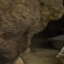

In [43]:
import matplotlib.pyplot as plt
import PIL
PIL.Image.fromarray((train_X[6]).astype(np.uint8))

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_data_train = augmentor.flow(X, y, batch_size=32, shuffle=True)
len(augmented_data_train)  # Number of batches in the augmented data

25

In [47]:

data_dir = "../dataset/cropped_dataset_val"
target_size = (224, 224)
val_X = []
val_y = []

classes = sorted(os.listdir(data_dir))  
for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_dir):
        continue
    for fname in os.listdir(class_dir):
        fpath = os.path.join(class_dir, fname)
        try:
            img = load_img(fpath, target_size=target_size)
            img_array = img_to_array(img)
            val_X.append(img_array)
            val_y.append(label)
        except Exception as e:
            print(f"Skipping {fpath}: {e}")

X = np.array(val_X) / 255.0
y = np.array(val_y)
len(X), len(y)  

(135, 135)

In [48]:
augmented_data_val = augmentor.flow(X, y, batch_size=32, shuffle=True)
len(augmented_data_val) 

5

This custom CNN is not Good For this Size Images

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

def build_small_cnn():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )
    
    return model
model = build_small_cnn()

In [58]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,785 (432.75 KB)

 Trainable params: 110,337 (431.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'custom_model.keras')

checkpoint = ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True, save_weights_only=False, verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=6, verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)

callbacks = [checkpoint, reduce_learning_rate]


In [61]:
history = model.fit(augmented_data_train,validation_data=augmented_data_val, epochs=25, batch_size=32, validation_split=0.2, callbacks = callbacks)

Epoch 1/25


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4429 - loss: 0.0000e+00

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.00000, saving model to d:\Tasks\Animal and Human Detection\models\custom_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.4421 - loss: 0.0000e+00 - val_accuracy: 0.7556 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4535 - loss: 0.0000e+00
Epoch 2: val_loss did not improve from 0.00000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4537 - loss: 0.0000e+00 - val_accuracy: 0.7481 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4597 - loss: 0.0000e+00
Epoch 3: val_loss did not improve from 0.00000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.4611 - loss: 0.0000e+00 - val_accuracy: 0.7259 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5076 - loss: 0.0000e+00
Epoch 4: val_loss did not improve from 0.00000
25/25 ━━━

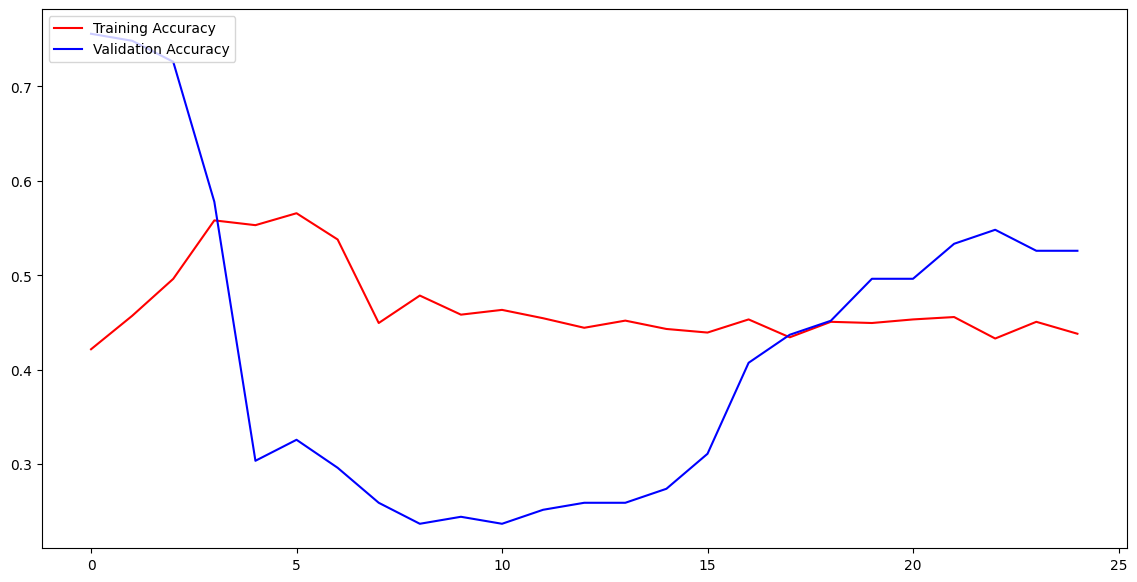

In [62]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


In [63]:
import pandas as pd
hist_=pd.DataFrame(history.history)
hist_

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.421717,0.0,0.755556,0.0,5.000000e-04
1,0.457071,0.0,0.748148,0.0,5.000000e-04
2,0.496212,0.0,0.725926,0.0,5.000000e-04
3,0.558081,0.0,0.577778,0.0,5.000000e-04
4,0.553030,0.0,0.303704,0.0,5.000000e-04
5,0.565657,0.0,0.325926,0.0,5.000000e-04
6,0.537879,0.0,0.296296,0.0,5.000000e-04
7,0.449495,0.0,0.259259,0.0,5.000000e-05
8,0.478535,0.0,0.237037,0.0,5.000000e-05
9,0.458333,0.0,0.244444,0.0,5.000000e-05


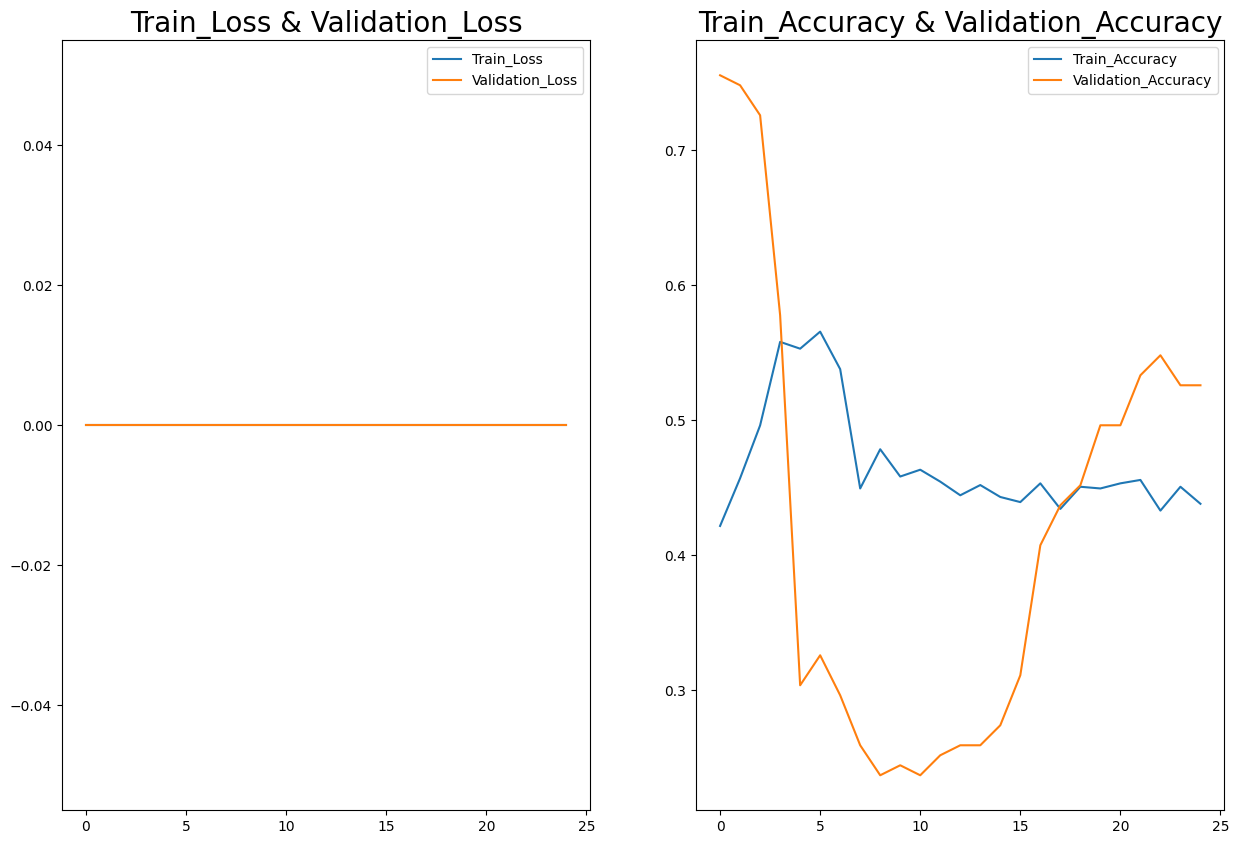

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [65]:

loss, acc = model.evaluate(augmented_data_val)
print(f"Validation Accuracy: {acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5754 - loss: 0.0000e+00
Validation Accuracy: 0.58


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


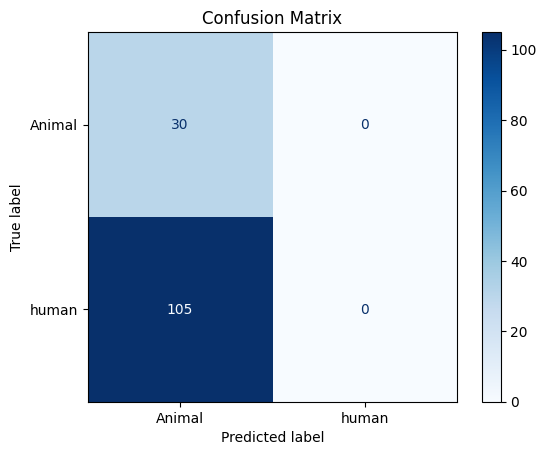

In [66]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
pred_probs = model.predict(augmented_data_val, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
class_labels = ["Animal" , "human"]
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# y_true = augmented_data_val.classes


In [67]:
classification_report(y, y_pred, target_names=class_labels, output_dict=True)

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

{'Animal': {'precision': 0.2222222222222222,
  'recall': 1.0,
  'f1-score': 0.36363636363636365,
  'support': 30.0},
 'human': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 105.0},
 'accuracy': 0.2222222222222222,
 'macro avg': {'precision': 0.1111111111111111,
  'recall': 0.5,
  'f1-score': 0.18181818181818182,
  'support': 135.0},
 'weighted avg': {'precision': 0.04938271604938271,
  'recall': 0.2222222222222222,
  'f1-score': 0.08080808080808081,
  'support': 135.0}}